In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RJ
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

# $E_{so, ext} \gg h_\perp$

## T vs $\alpha_{int}/\alpha_{ext}$ at constant energy 

In [2]:
alpha_coef = np.arange(-5, 5, 0.01)


alp_r = 8
Eso_profile = [alp_r, -1, alp_r]
x_profile = [-6, 6]

junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
enn = [0, 0.5, -0.9, 1.2, -1.1]
lbl = []

for a in enn:
    trasmission_coeff_tmp = []
    lbl.append(f"energy: {a}")
    for i in alpha_coef:
        
        if a < -1 and np.abs(i) < 0.5 or -np.abs(i)*(1+(1/(2*np.abs(i)))**2) > a:
            trasmission_coeff_tmp.append(np.nan)
        else:
            junction[1] = i
            S = junction.get_scattering_matrix(a)
            if not S.is_unitary:
                print(f"{a}, {i} {-np.abs(i)*(1+(1/(2*np.abs(i)))**2)} isn't unitary")
                trasmission_coeff_tmp.append(np.nan)
            else:
                trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)
    

<IPython.core.display.Javascript object>


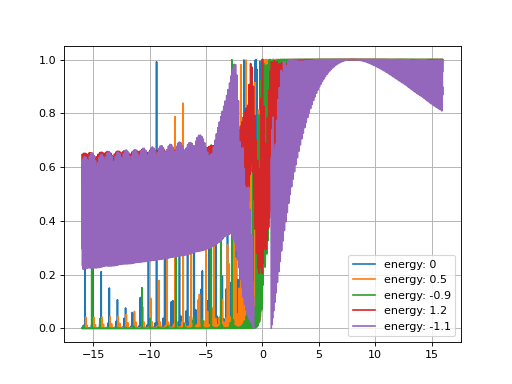

In [3]:
%matplotlib notebook
for i in range(len(trasmission_coeff_total)):
    plt.plot(alpha_coef, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

## T vs E at constant $\alpha_{int}/\alpha_{ext}$

In [4]:
en = np.arange(-2.5, 2, 0.0011)
# en = np.arange(-4.0625, 2, 0.011)

# en = np.arange(0.999, 1.0002, 0.0000011)


alp_r = 8
Eso_profile = [alp_r, -1, alp_r]
x_profile = [-1, 1]


junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []

# alp = [-4, 4, -0.4, 0.4, -0.2, 0.2, np.finfo(np.float64).eps]
alp = [np.finfo(np.float64).eps]

lbl = []


for a in alp:
#     print(a)
    trasmission_coeff_tmp = []
    lbl.append(f"center alpha: {a}")
    for i in en:
        if i < -1 and -np.abs(a)*(1+(1/(2*np.abs(a)))**2) > i:
            trasmission_coeff_tmp.append(np.nan)
        else:
            junction[1] = a
            S = junction.get_scattering_matrix(i)
            if not S.is_unitary:
                print(f"{a}, {i} {-np.abs(i)*(1+(1/(2*np.abs(i)))**2)} isn't unitary")
                trasmission_coeff_tmp.append(np.nan)
            else:
                trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


KeyboardInterrupt: 

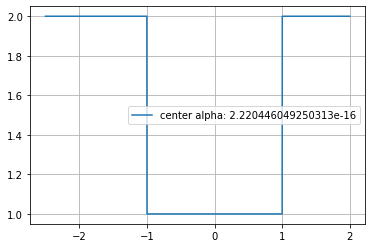

In [3]:
# %matplotlib notebook
# %matplotlib notebook

i = -1
plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


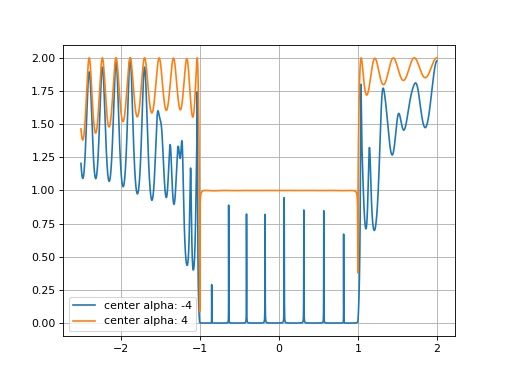

In [4]:
%matplotlib notebook
for i in range(2):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


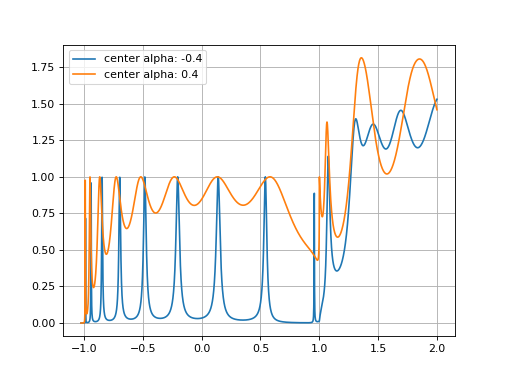

In [5]:
%matplotlib notebook
for i in range(2, 4):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


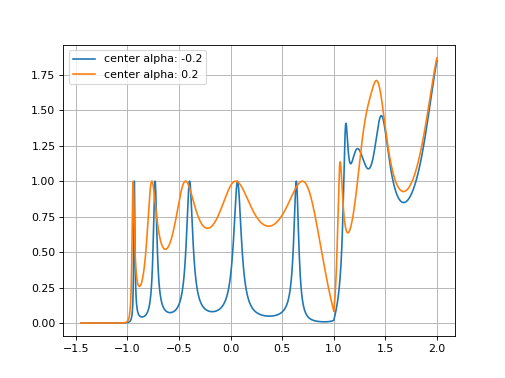

In [6]:
%matplotlib notebook
for i in range(4, 6):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

# $E_{so,ext} \ll h_\perp$

## T vs $\alpha_{int}/\alpha_{ext}$ at constant energy 

In [18]:
alpha_coef = np.arange(-5, 5, 0.01)


alp_r = 0.1
Eso_profile = [alp_r, -1, alp_r]
x_profile = [-6, 6]

junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile


trasmission_coeff_total = []
enn = [0, 0.5, -0.9, 1.2]
lbl = []

for a in enn:
    trasmission_coeff_tmp = []
    lbl.append(f"energy: {a}")
    for i in alpha_coef:
        junction[1] = i
        S = junction.get_scattering_matrix(a)
        if not S.is_unitary:
            print(f"{i}isn't unitary")
        trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


<IPython.core.display.Javascript object>


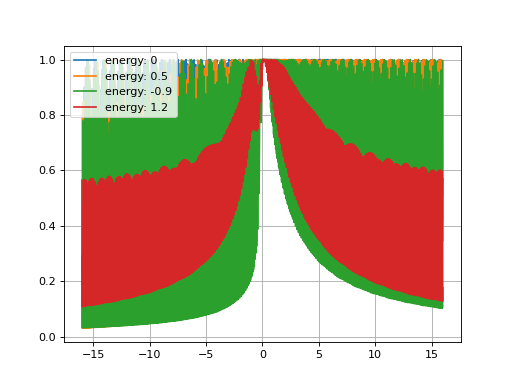

In [19]:
%matplotlib notebook
for i in range(len(trasmission_coeff_total)):
    plt.plot(alpha_coef, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

## T vs E at constant $\alpha_{int}/\alpha_{ext}$

In [7]:
en = np.arange(-0.99, 2, 0.0011)
# en = np.arange(0.999, 1.0002, 0.0000011)

alp_r = 0.08
Eso_profile = [alp_r, -1, alp_r]
x_profile = [-6, 6]

junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
alp = [-4, 4, -0.4, 0.4, -0.2, 0.2, np.finfo(np.float64).eps]
lbl = []


for a in alp:
    trasmission_coeff_tmp = []
    lbl.append(f"center alpha: {a}")
    for i in en:
        junction[1] = a
        S = junction.get_scattering_matrix(i)
        if not S.is_unitary:
            print(f"{i}isn't unitary")
        trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


<IPython.core.display.Javascript object>


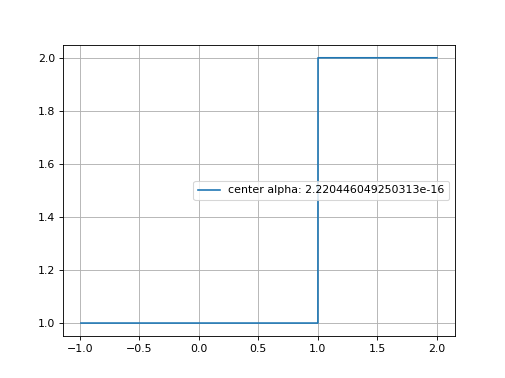

In [8]:
%matplotlib notebook
i = -1
plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


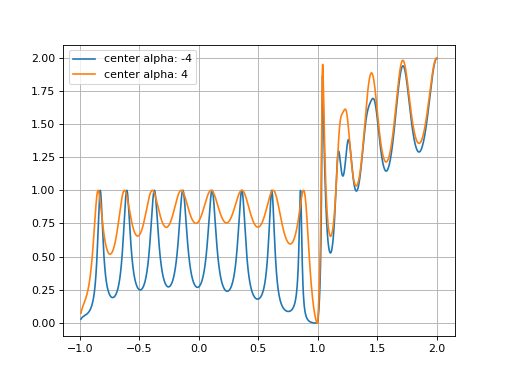

In [9]:
%matplotlib notebook
for i in range(2):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


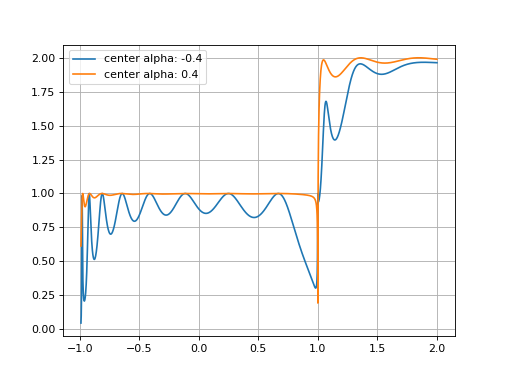

In [10]:
%matplotlib notebook
for i in range(2, 4):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


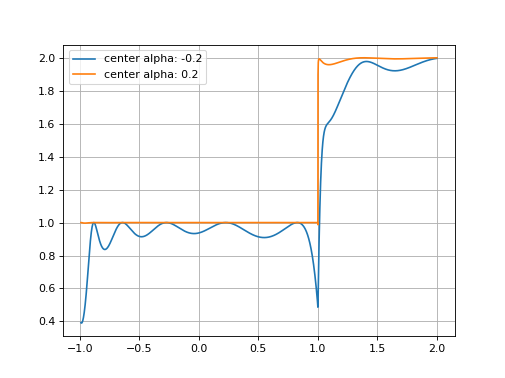

In [11]:
%matplotlib notebook
for i in range(4, 6):
    plt.plot(en, trasmission_coeff_total[i], label=lbl[i])
plt.legend()
plt.grid(True)